In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.2 pynndescent==0.5.12


In [3]:
results_file = './tabula-muris-senis-bbknn-processed-official-annotations.h5ad'

In [4]:
adata = sc.read(results_file)

/home/kojima/anaconda3/envs/singlecell/lib/python3.10/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/kojima/anaconda3/envs/singlecell/lib/python3.10/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [5]:
adata

AnnData object with n_obs × n_vars = 356213 × 20116
    obs: 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'louvain', 'leiden', 'tissue_FACS_droplet'
    var: 'n_cells-0', 'n_cells-1', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'leiden', 'louvain', 'louvain_colors', 'method_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [6]:
adata.obs

age batch                                   cell  \
index                                                                           
AAACCTGCAGGGTACA-1-0-0-0-0   24m     0  MACA_24m_M_TONGUE_60_AAACCTGCAGGGTACA   
AAACCTGCAGTAAGCG-1-0-0-0-0   24m     0  MACA_24m_M_TONGUE_60_AAACCTGCAGTAAGCG   
AAACCTGTCATTATCC-1-0-0-0-0   24m     0  MACA_24m_M_TONGUE_60_AAACCTGTCATTATCC   
AAACGGGGTACAGTGG-1-0-0-0-0   24m     0  MACA_24m_M_TONGUE_60_AAACGGGGTACAGTGG   
AAACGGGGTCTTCTCG-1-0-0-0-0   24m     0  MACA_24m_M_TONGUE_60_AAACGGGGTCTTCTCG   
...                          ...   ...                                    ...   
P8_MAA001690_S20.mus-2-1-1   21m     1                                    nan   
P8_MAA001700_S104.mus-2-1-1  21m     1                                    nan   
P9_B000485_S69.mus-2-1-1     18m     1                                    nan   
P9_B000492_S153.mus-2-1-1    18m     1                                    nan   
P9_MAA001700_S105.mus-2-1-1  21m     1                                    nan   

                            cell_ontology_class cell_ontology_id  \
index                                                              
AAACCTGCAGGGTACA-1-0-0-0-0         keratinocyte               NA   
AAACCTGCAGTAAGCG-1-0-0-0-0         keratinocyte               NA   
AAACCTGTCATTATCC-1-0-0-0-0         keratinocyte               NA   
AAACGGGGTACAGTGG-1-0-0-0-0         keratinocyte               NA   
AAACGGGGTCTTCTCG-1-0-0-0-0         keratinocyte               NA   
...                                         ...              ...   
P8_MAA001690_S20.mus-2-1-1           basal cell               NA   
P8_MAA001700_S104.mus-2-1-1          basal cell               NA   
P9_B000485_S69.mus-2-1-1             basal cell               NA   
P9_B000492_S153.mus-2-1-1            basal cell               NA   
P9_MAA001700_S105.mus-2-1-1          basal cell               NA   

                                        free_annotation   method mouse.id  \
index                                                                       
AAACCTGCAGGGTACA-1-0-0-0-0                     filiform  droplet  24-M-60   
AAACCTGCAGTAAGCG-1-0-0-0-0                   suprabasal  droplet  24-M-60   
AAACCTGTCATTATCC-1-0-0-0-0                   suprabasal  droplet  24-M-60   
AAACGGGGTACAGTGG-1-0-0-0-0   suprabasal differentiating  droplet  24-M-60   
AAACGGGGTCTTCTCG-1-0-0-0-0   suprabasal differentiating  droplet  24-M-60   
...                                                 ...      ...      ...   
P8_MAA001690_S20.mus-2-1-1                   basal cell     facs  21_54_F   
P8_MAA001700_S104.mus-2-1-1                  basal cell     facs  21_55_F   
P9_B000485_S69.mus-2-1-1                     basal cell     facs  18_47_F   
P9_B000492_S153.mus-2-1-1                    basal cell     facs  18_46_F   
P9_MAA001700_S105.mus-2-1-1                  basal cell     facs  21_55_F   

                              n_counts  n_genes     sex      subtissue  \
index                                                                    
AAACCTGCAGGGTACA-1-0-0-0-0      5482.0   2107.0    male            nan   
AAACCTGCAGTAAGCG-1-0-0-0-0     21855.0   3481.0    male            nan   
AAACCTGTCATTATCC-1-0-0-0-0     10942.0   2599.0    male            nan   
AAACGGGGTACAGTGG-1-0-0-0-0     20665.0   3468.0    male            nan   
AAACGGGGTCTTCTCG-1-0-0-0-0     12925.0   3189.0    male            nan   
...                                ...      ...     ...            ...   
P8_MAA001690_S20.mus-2-1-1    146918.0   3523.0  female  Mammary_Gland   
P8_MAA001700_S104.mus-2-1-1  1027448.0   4476.0  female  Mammary_Gland   
P9_B000485_S69.mus-2-1-1     1184028.0   2980.0  female  Mammary_Gland   
P9_B000492_S153.mus-2-1-1     771112.0   2595.0  female  Mammary_Gland   
P9_MAA001700_S105.mus-2-1-1    31365.0   2520.0  female  Mammary_Gland   

                                    tissue tissue_free_annotation louvain  \
index                                           

In [7]:
adata.var

n_cells-0  n_cells-1     means  dispersions  dispersions_norm  \
index                                                                         
Xkr4                147       1033  0.002346     1.637490         -0.151752   
Rp1                 233        512  0.001932     3.440012          1.884511   
Sox17             27289       8682  0.364107     2.981940          1.346346   
Mrpl15            95312      36628  0.421241     3.758855          2.255921   
Lypla1            86096      33500  0.375493     1.401394         -0.504083   
...                 ...        ...       ...          ...               ...   
LOC434960             5          8  0.000023     1.026086         -0.842439   
LOC380994            32         85  0.000307     2.609386          0.946174   
LOC100041346         19         47  0.000091     0.838271         -1.054610   
Sly                   9         38  0.000048     0.786838         -1.112712   
Erdr1             82965      38185  0.373171     1.213511         -0.724047   

              highly_variable  
index                          
Xkr4                    False  
Rp1                     False  
Sox17                    True  
Mrpl15                   True  
Lypla1                  False  
...                       ...  
LOC434960               False  
LOC380994               False  
LOC100041346            False  
Sly                     False  
Erdr1                   False  

[20116 rows x 6 columns]

In [8]:
adata.var[adata.var["highly_variable"]==True]

n_cells-0  n_cells-1     means  dispersions  dispersions_norm  \
index                                                                    
Sox17        27289       8682  0.364107     2.981940          1.346346   
Mrpl15       95312      36628  0.421241     3.758855          2.255921   
Msc           3400       3664  0.052632     2.425148          0.738045   
Rdh10        21004      11328  0.126575     2.402273          0.712204   
Stau2         7725       9509  0.039526     3.206601          1.620833   
...            ...        ...       ...          ...               ...   
S100g        12536       2922  0.705977     6.661724          4.356267   
Tmem27       19194       5088  0.699537     3.820078          1.635117   
Gpm6b        23794      24735  0.523495     4.070674          2.620984   
Trappc2       4788      16352  0.065124     2.705460          1.054706   
Tmsb4x      385127     127938  4.454467     4.734307          1.000000   

         highly_variable  
index                     
Sox17               True  
Mrpl15              True  
Msc                 True  
Rdh10               True  
Stau2               True  
...                  ...  
S100g               True  
Tmem27              True  
Gpm6b               True  
Trappc2             True  
Tmsb4x              True  

[2488 rows x 6 columns]

In [9]:
adata_D=adata[:,adata.var["highly_variable"]==True]

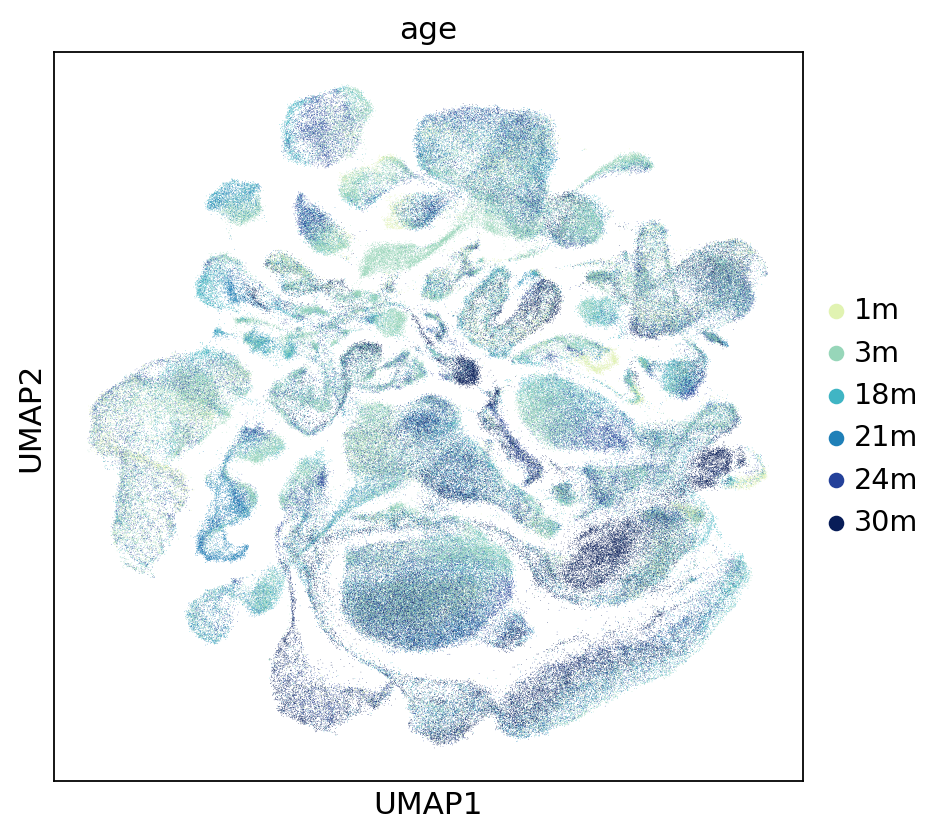

In [10]:
# Inital setting for plot size
from matplotlib import rcParams

FIGSIZE = (6, 6)
rcParams["figure.figsize"] = FIGSIZE

sc.pl.umap(adata_D, color="age")
#sc.pl.umap(adata_D, color=["batch", "louvain"])

/home/kojima/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


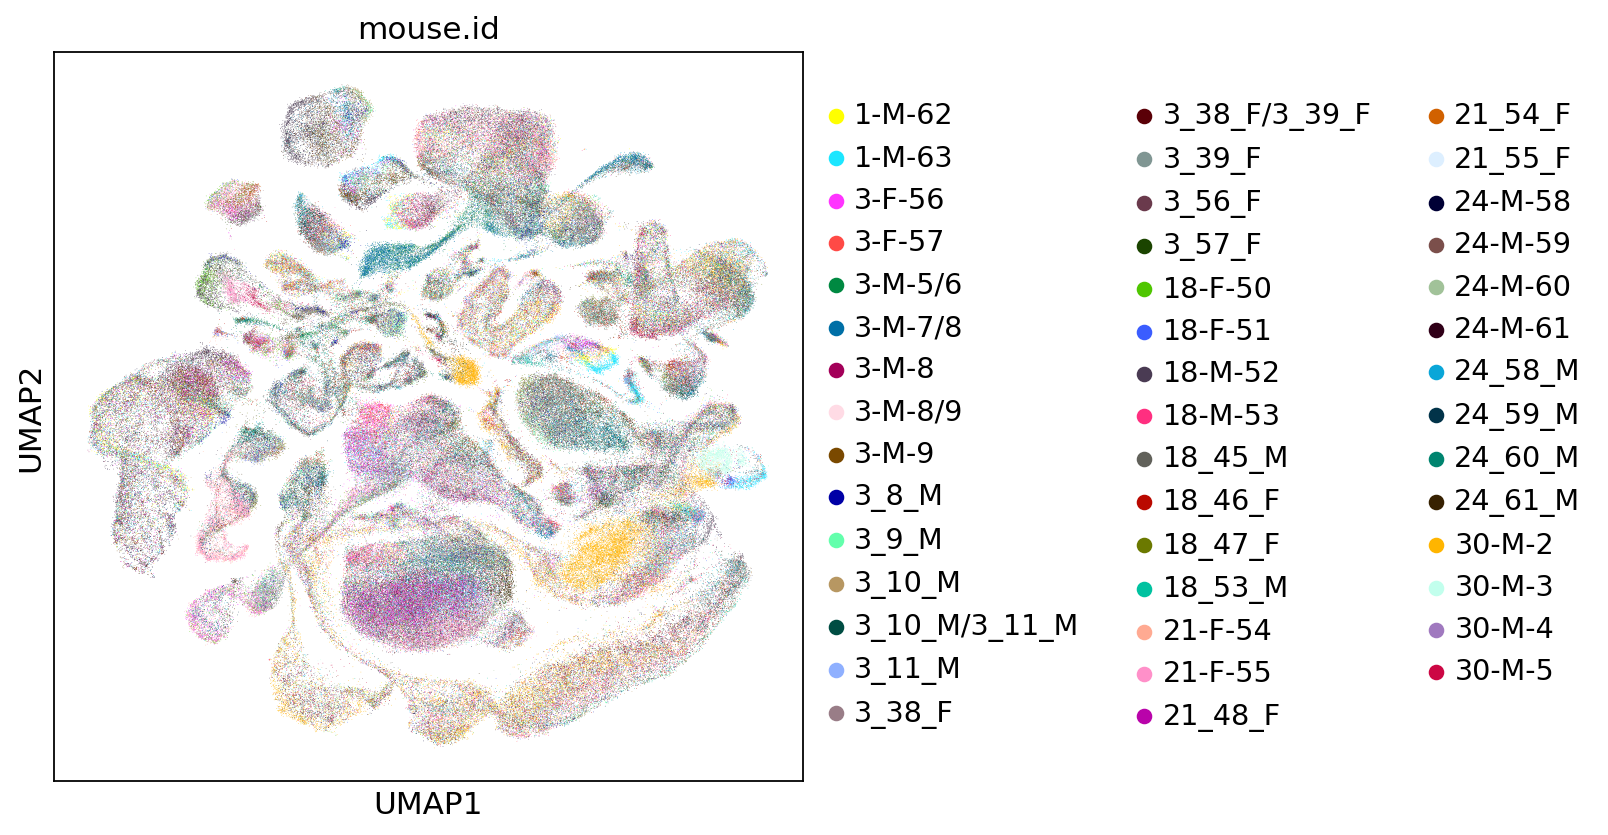

In [11]:
sc.pl.umap(adata_D, color="mouse.id")

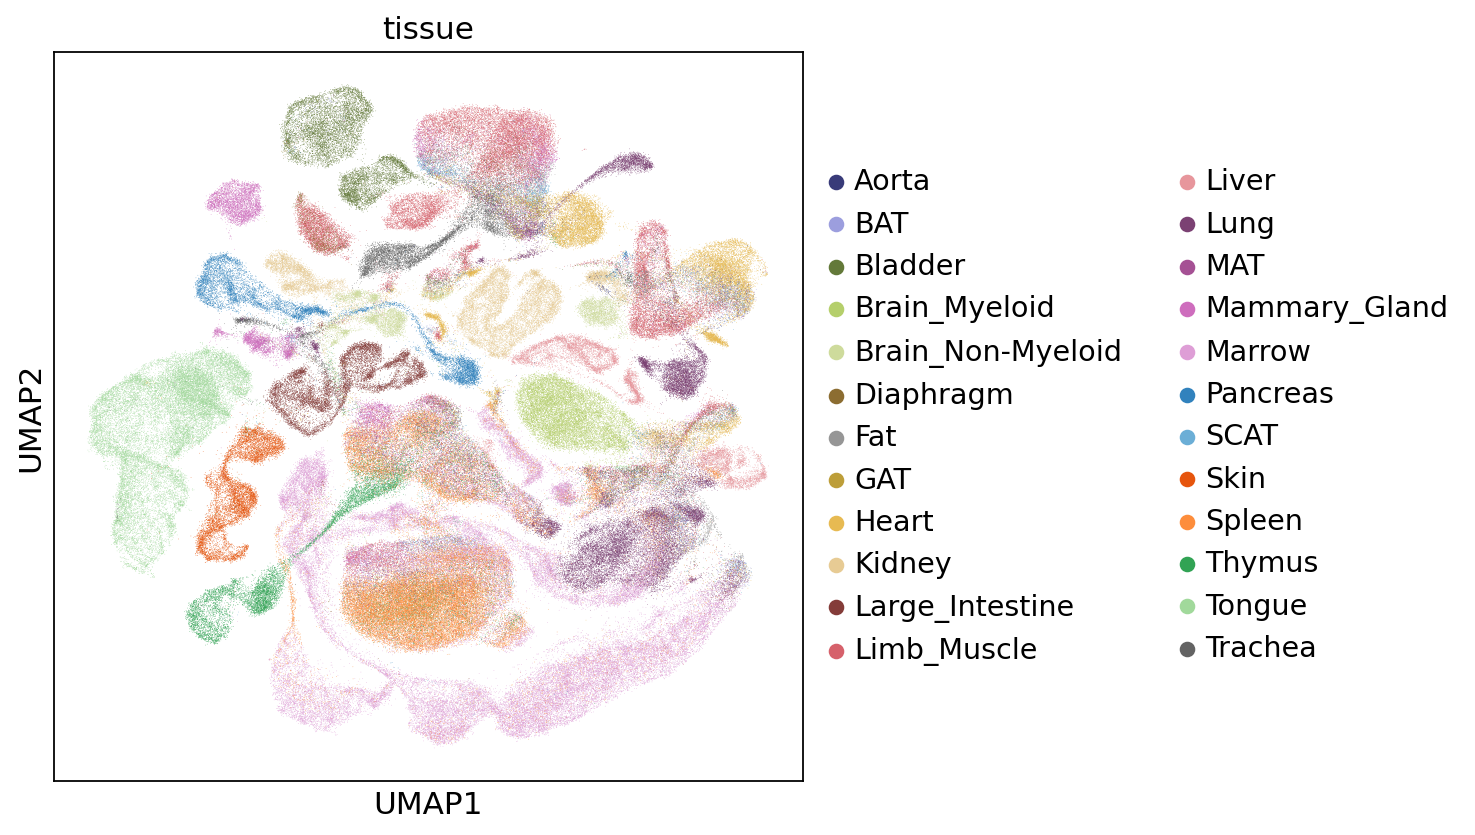

In [12]:
sc.pl.umap(adata_D, color="tissue")

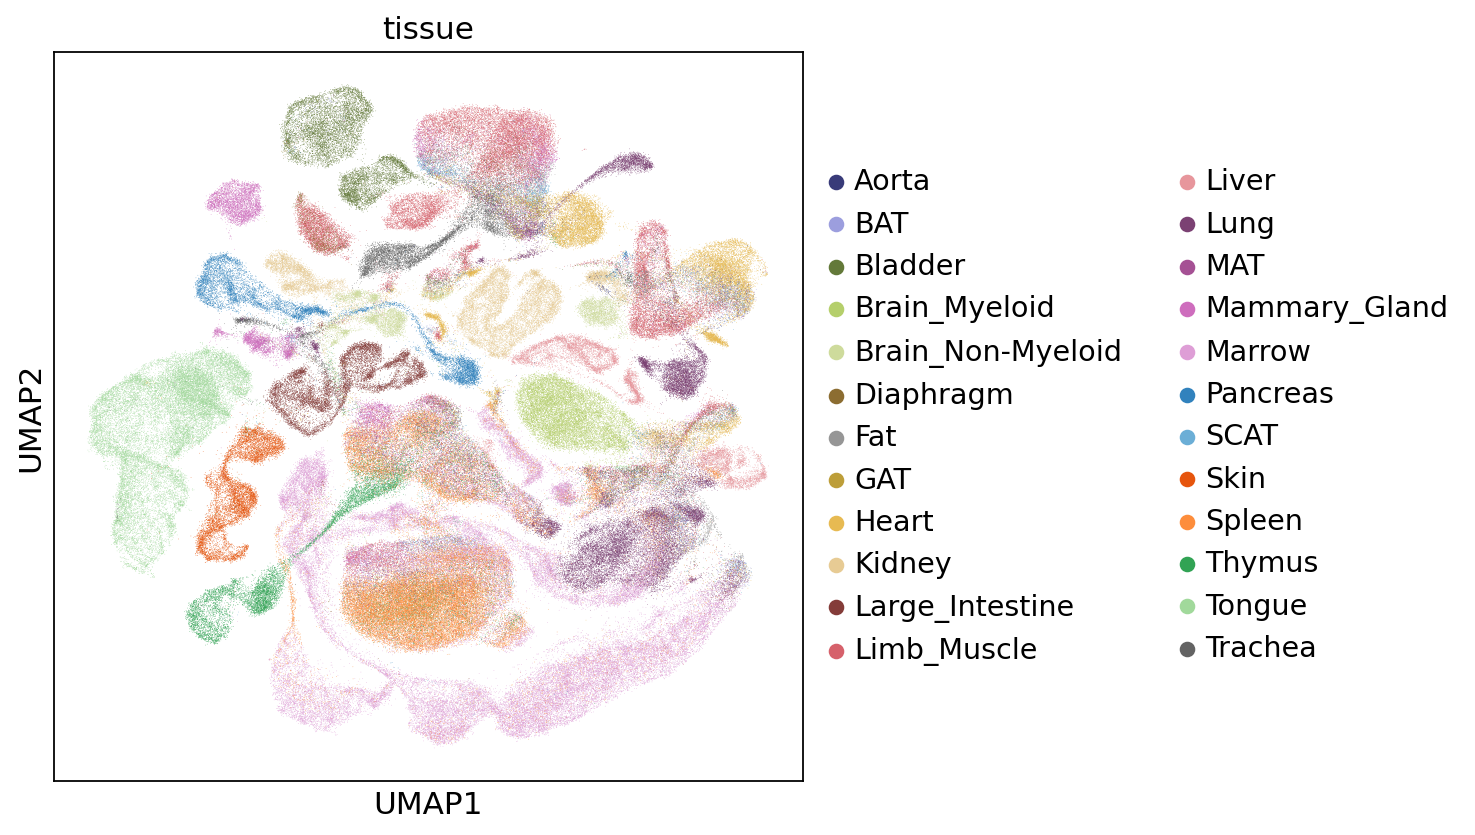

In [13]:
sc.pl.umap(adata_D, color="tissue")

In [14]:
print(len(adata.obs["tissue"].unique().tolist()))
#for el in adata.obs["tissue"].unique().tolist():
#    adata[obs["tissue"]==el, adata.var["highly_variable"]==True ]

24


In [20]:
var=adata.var[adata.var["highly_variable"]==True].index.tolist()
sorted(var)

['0610010O12Rik',
 '0610040J01Rik',
 '1100001G20Rik',
 '1110002N22Rik',
 '1110032A04Rik',
 '1110050K14Rik',
 '1190002H23Rik',
 '1500010J02Rik',
 '1500015O10Rik',
 '1600029D21Rik',
 '1700019D03Rik',
 '1700030C10Rik',
 '1700084E18Rik',
 '1700086L19Rik',
 '1810011O10Rik',
 '1810012P15Rik',
 '1810030J14Rik',
 '1810046K07Rik',
 '1810065E05Rik',
 '2010001M09Rik',
 '2010016I18Rik',
 '2010109I03Rik',
 '2200002D01Rik',
 '2210010C04Rik',
 '2210404O07Rik',
 '2210408F21Rik',
 '2210415F13Rik',
 '2310002J15Rik',
 '2310002L13Rik',
 '2310008H04Rik',
 '2310034C09Rik',
 '2310042D19Rik',
 '2310046O06Rik',
 '2310050C09Rik',
 '2310061N02Rik',
 '2310068J16Rik',
 '2310079G19Rik',
 '2410091C18Rik',
 '2510012J08Rik',
 '2610019F03Rik',
 '2610528A11Rik',
 '2700089E24Rik',
 '2810007J24Rik',
 '2810405K02Rik',
 '2810417H13Rik',
 '2810468N07Rik',
 '2900041M22Rik',
 '3110079O15Rik',
 '4632415L05Rik',
 '4921513D23Rik',
 '4930549G23Rik',
 '4933434E20Rik',
 '5031439G07Rik',
 '5430417L22Rik',
 '5430421N21Rik',
 '5730409E

In [19]:
if "APP" in var:
    print("APP")
if "PSEN1" in var:
    print("PSEN1")
if "PSEN2" in var:
    print("PSEN2")
